# NYC Housing Analysis

In [1]:
!pip install xlrd
!pip install zipfile36

In [2]:
from pathlib import Path
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas as hvplot

# 2017

In [3]:
# Import csv files on rental housing for 2017 for the five boroughs of NYC.
# Verify the files exist. Verification method is written in markdown

file_path = Path(r"C:\Users\ppate\fintech_files\2017_manhattan_.xls")
file_path2 = Path(r"C:\Users\ppate\fintech_files\2017_bronx.xls")
file_path3 = Path(r"C:\Users\ppate\fintech_files\2017_brooklyn.xls")
file_path4 = Path(r"C:\Users\ppate\fintech_files\2017_queens.xls")
file_path5 = Path(r"C:\Users\ppate\fintech_files\2017_statenisland.xls")

#if file_path.exists():
    #print("File exists!")

In [4]:
# Turn each file into a dataframe, merge the five dataframes to create a 
# dataframe for the year 2017

initial_data_2017_man = pd.read_excel(file_path, header = None)
initial_data_2017_brx = pd.read_excel(file_path2, header = None)
initial_data_2017_bro = pd.read_excel(file_path3, header = None)
initial_data_2017_que = pd.read_excel(file_path4, header = None)
initial_data_2017_sta = pd.read_excel(file_path5, header = None)


merge = [initial_data_2017_man, initial_data_2017_brx, initial_data_2017_bro, 
         initial_data_2017_que, initial_data_2017_sta]
data_2017 = pd.concat(merge)
#data_2017


#print(data_2017.columns)
data_2017.columns = data_2017.columns.astype(str)
#data_2017

#Change the datatype of column 19 to str, and change the format of the date 
# in column 20 to display only the year

data_2017['19'].astype(str)
numeric_values = pd.to_numeric(data_2017['19'], errors='coerce')
data_2017['20'] = pd.to_datetime(data_2017['20'], errors = 'coerce')
data_2017['20'] = data_2017['20'].dt.strftime('%Y')
data_2017


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 17/18,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 17/18,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,...,11,0,11,1750,6500,1900,2,C4,3750000,2017
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,,...,24,1,25,2650,9960,1910,2,C7,5235000,2017
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,,...,5,0,5,2139,4416,1900,2,C2,0,2017
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9597,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,50,,B9,23 QUAIL LANE,,...,2,0,2,4765,2575,1998,1,B9,690000,2017
9598,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,2017
9599,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,2017
9600,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6913,69,,V0,N/A CARLTON AVENUE,,...,0,0,0,2000,0,0,1,V0,0,2017


In [5]:
# Remove columns that are not relevant

cleaning_data_2017 = data_2017.drop(['0','2','3','4','5','6','7','8', '9', '11', '12', '13', '14', '15', '16', '17'], axis = 1)
cleaning_data_2017

,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,ALPHABET CITY,10009,C4,3750000,2017
2,ALPHABET CITY,10009,C7,5235000,2017
3,ALPHABET CITY,10009,C2,0,2017
4,ALPHABET CITY,10009,C2,6625000,2017
...,...,...,...,...,...
9597,WOODROW,10309,B9,690000,2017
9598,WOODROW,10309,B9,550000,2017
9599,WOODROW,10309,B2,460000,2017
9600,WOODROW,10309,V0,0,2017


In [6]:
print(cleaning_data_2017.columns)

Index(['1', '10', '18', '19', '20'], dtype='object')


In [7]:
# Remove null values in the SALE PRICE column

cleaning_data_2017.drop(cleaning_data_2017[cleaning_data_2017['19'] == 0].index, inplace=True)
cleaning_data_2017

,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,ALPHABET CITY,10009,C4,3750000,2017
2,ALPHABET CITY,10009,C7,5235000,2017
4,ALPHABET CITY,10009,C2,6625000,2017
10,ALPHABET CITY,10009,C6,499000,2017
...,...,...,...,...,...
9583,WOODROW,10309,B2,625000,2017
9584,WOODROW,10309,B2,625000,2017
9585,WOODROW,10309,B2,168000,2017
9591,WOODROW,10309,B9,610000,2017


In [8]:
# Calculate the mean of NYC housing prices for 2017

average_sale_price_2017 = numeric_values.mean()
print(f"The average sale price in NYC for 2017 was ${average_sale_price_2017:.2f}")

The average sale price in NYC for 2017 was $1004933.38


# 2018

In [9]:
# Import csv files on rental housing for 2018 for the five boroughs of NYC.
# Verify the files exist. Verification method is written in markdown

file_path_2018 = Path(r"C:\Users\ppate\fintech_files\2018_manhattan.xlsx")
file_path2_2018 = Path(r"C:\Users\ppate\fintech_files\2018_bronx.xlsx")
file_path3_2018 = Path(r"C:\Users\ppate\fintech_files\2018_brooklyn.xlsx")
file_path4_2018 = Path(r"C:\Users\ppate\fintech_files\2018_queens.xlsx")
file_path5_2018 = Path(r"C:\Users\ppate\fintech_files\2018_statenisland.xlsx")

#if file_path.exists():
    #print("File exists!")

In [10]:
# Turn each file into a dataframe, merge the five dataframes to create a 
# dataframe for the year 2017

initial_data_2018_man = pd.read_excel(file_path_2018, header = None)
initial_data_2018_brx = pd.read_excel(file_path2_2018, header = None)
initial_data_2018_bro = pd.read_excel(file_path3_2018, header = None)
initial_data_2018_que = pd.read_excel(file_path4_2018, header = None)
initial_data_2018_sta = pd.read_excel(file_path5_2018, header = None)

merge = [initial_data_2018_man, initial_data_2018_brx, initial_data_2018_bro, 
         initial_data_2018_que, initial_data_2018_sta]
data_2018 = pd.concat(merge)
#data_2018

#print(data_2018.columns)
data_2018.columns = data_2018.columns.astype(str)
#data_2018

#Change the datatype of column 19 to str, and change the format of the date 
# in column 20 to display only the year

data_2018['19'].astype(str)
numeric_values = pd.to_numeric(data_2018['19'], errors='coerce')
data_2018['20'] = pd.to_datetime(data_2018['20'], errors = 'coerce')
data_2018['20'] = data_2018['20'].dt.strftime('%Y')
data_2018

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1,0,1,987,2183,1860,1,A4,0,2018
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1,0,1,987,2183,1860,1,A4,4844809,2018
3,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,NaN,A4,526 EAST 5TH STREET,NaN,...,1,0,1,1883,5200,1900,1,A4,6100000,2018
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NaN,B1,113 AVENUE C,NaN,...,2,0,2,1218,4764,1899,1,B1,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8786,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7094,61,NaN,V0,23 WILTSHIRE LANE,NaN,...,0,0,0,4427,0,2018,1,V0,793216,2018
8787,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,289,NaN,A5,41 JADE COURT,NaN,...,1,0,1,2955,2612,2018,1,V0,671026,2018
8788,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,298,NaN,A5,11 JADE COURT,NaN,...,1,0,1,4108,2612,2018,1,V0,610950,2018
8789,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,299,NaN,A5,9 JADE COURT,NaN,...,1,0,1,11019,2612,2018,1,V0,672043,2018


In [11]:
# Remove columns that are not relevant

cleaning_data_2018 = data_2018.drop(['0','2','3','4','5','6','7','8', '9', '11', '12', '13', '14', '15', '16', '17'], axis = 1)
cleaning_data_2018

,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,ALPHABET CITY,10009,A4,0,2018
2,ALPHABET CITY,10009,A4,4844809,2018
3,ALPHABET CITY,10009,A4,6100000,2018
4,ALPHABET CITY,10009,B1,0,2018
...,...,...,...,...,...
8786,WOODROW,10309,V0,793216,2018
8787,WOODROW,10309,V0,671026,2018
8788,WOODROW,10309,V0,610950,2018
8789,WOODROW,10309,V0,672043,2018


In [12]:
# Remove null values in the SALE PRICE column

cleaning_data_2018.drop(cleaning_data_2018[cleaning_data_2018['19'] == 0].index, inplace=True)
cleaning_data_2018

,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
3,ALPHABET CITY,10009,A4,6100000,2018
7,ALPHABET CITY,10009,C7,8300000,2018
9,ALPHABET CITY,10009,C1,5000000,2018
12,ALPHABET CITY,10009,C4,2400000,2018
...,...,...,...,...,...
8726,WOODROW,10309,B2,655000,2018
8731,WOODROW,10309,B9,625000,2018
8740,WOODROW,10309,B2,799900,2018
8781,WOODROW,10309,B2,675000,2018


In [13]:
# Calculate the mean of NYC housing prices for 2018

average_sale_price_2018 = numeric_values.mean()
print(f"The average sale price in NYC for 2018 was ${average_sale_price_2018:.2f}")

The average sale price in NYC for 2018 was $1149610.62


# 2019 

In [14]:
# Import csv files on rental housing for 2019 for the five boroughs of NYC.
# Verify the files exist. Verification method is written in markdown

file_path_2019 = Path(r"C:\Users\ppate\fintech_files\2019_manhattan.xlsx")
file_path2_2019 = Path(r"C:\Users\ppate\fintech_files\2019_bronx.xlsx")
file_path3_2019 = Path(r"C:\Users\ppate\fintech_files\2019_brooklyn.xlsx")
file_path4_2019 = Path(r"C:\Users\ppate\fintech_files\2019_queens.xlsx")
file_path5_2019 = Path(r"C:\Users\ppate\fintech_files\2019_statenisland.xlsx")

#if file_path.exists():
    #print("File exists!")

In [15]:
# Turn each file into a dataframe, merge the five dataframes to create a 
# dataframe for the year 2019

initial_data_2019_man = pd.read_excel(file_path_2019, header = None)
initial_data_2019_brx = pd.read_excel(file_path2_2019, header = None)
initial_data_2019_bro = pd.read_excel(file_path3_2019, header = None)
initial_data_2019_que = pd.read_excel(file_path4_2019, header = None)
initial_data_2019_sta = pd.read_excel(file_path5_2019, header = None)

merge = [initial_data_2019_man, initial_data_2019_brx, initial_data_2019_bro, 
         initial_data_2019_que, initial_data_2019_sta]
data_2019 = pd.concat(merge)
#data_2019

#print(data_2019.columns)
data_2019.columns = data_2019.columns.astype(str)
#data_2019

#Change the datatype of column 19 to str, and change the format of the date 
# in column 20 to display only the year

data_2019['19'].astype(str)
numeric_values = pd.to_numeric(data_2019['19'], errors='coerce')
data_2019['20'] = pd.to_datetime(data_2019['20'], errors = 'coerce')
data_2019['20'] = data_2019['20'].dt.strftime('%Y')
data_2019

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6TH STREET,NaN,...,1,1,2,2090,3680,1940,1,S1,3200000,2019
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1,0,1,987,2183,1860,1,A4,0,2019
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2,0,2,1510,4520,1900,1,B9,0,2019
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56,NaN,C0,263 EAST 7TH STREET,NaN,...,3,0,3,2430,3600,1899,1,C0,6300000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,95,NaN,B9,115 AMBASSADOR LANE,NaN,...,2,0,2,8846,1710,2001,1,B9,637500,2019
8368,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7094,48,NaN,B9,108 BERKSHIRE LANE,NaN,...,2,0,2,0,0,2018,1,V0,599701,2019
8369,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7094,49,NaN,B9,35 WILTSHIRE LANE,NaN,...,2,0,2,0,0,2018,1,V0,896060,2019
8370,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,28,NaN,V0,N/A QUAIL LANE,NaN,...,0,0,0,2640,0,NaN,1,V0,26000,2019


In [16]:
# Remove columns that are not relevant

cleaning_data_2019 = data_2019.drop(['0','2','3','4','5','6','7','8', '9', '11', '12', '13', '14', '15', '16', '17'], axis = 1)
cleaning_data_2019

,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,ALPHABET CITY,10009,S1,3200000,2019
2,ALPHABET CITY,10009,A4,0,2019
3,ALPHABET CITY,10009,B9,0,2019
4,ALPHABET CITY,10009,C0,6300000,2019
...,...,...,...,...,...
8367,WOODROW,10309,B9,637500,2019
8368,WOODROW,10309,V0,599701,2019
8369,WOODROW,10309,V0,896060,2019
8370,WOODROW,10309,V0,26000,2019


In [17]:
# Remove null values in the SALE PRICE column

cleaning_data_2019.drop(cleaning_data_2019[cleaning_data_2019['19'] == 0].index, inplace=True)
cleaning_data_2019

,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
15,ALPHABET CITY,10009,C7,1550000,2019
39,ALPHABET CITY,10009,C6,550000,2019
51,ALPHABET CITY,10009,C6,295000,2019
59,ALPHABET CITY,10009,C6,675000,2019
...,...,...,...,...,...
8361,WOODROW,10309,B9,640000,2019
8362,WOODROW,10309,B2,917000,2019
8364,WOODROW,10309,B9,610000,2019
8367,WOODROW,10309,B9,637500,2019


In [18]:
# Calculate the mean of NYC housing prices for 2019

average_sale_price_2019 = numeric_values.mean()
print(f"The average sale price in NYC for 2019 was ${average_sale_price_2019:.2f}")

The average sale price in NYC for 2019 was $1395314.84


# 2020

In [19]:
# Import csv files on rental housing for 2020 for the five boroughs of NYC.
# Verify the files exist. Verification method is written in markdown

file_path_2020 = Path(r"C:\Users\ppate\fintech_files\2020_manhattan.xlsx")
file_path2_2020 = Path(r"C:\Users\ppate\fintech_files\2020_bronx.xlsx")
file_path3_2020 = Path(r"C:\Users\ppate\fintech_files\2020_brooklyn.xlsx")
file_path4_2020 = Path(r"C:\Users\ppate\fintech_files\2020_queens.xlsx")
file_path5_2020 = Path(r"C:\Users\ppate\fintech_files\2020_staten_island.xlsx")

#if file_path.exists():
    #print("File exists!")

In [20]:
# Turn each file into a dataframe, merge the five dataframes to create a 
# dataframe for the year 2020

initial_data_2020_man = pd.read_excel(file_path_2020, header = None)
initial_data_2020_brx = pd.read_excel(file_path2_2020, header = None)
initial_data_2020_bro = pd.read_excel(file_path3_2020, header = None)
initial_data_2020_que = pd.read_excel(file_path4_2020, header = None)
initial_data_2020_sta = pd.read_excel(file_path5_2020, header = None)


merge = [initial_data_2020_man, initial_data_2020_brx, initial_data_2020_bro, 
         initial_data_2020_que, initial_data_2020_sta]
data_2020 = pd.concat(merge)
#data_2020

#print(data_2020.columns)
data_2020.columns = data_2020.columns.astype(str)
#data_2020

#Change the datatype of column 19 to str, and change the format of the date 
# in column 20 to display only the year

data_2020['19'].astype(str)
numeric_values = pd.to_numeric(data_2020['19'], errors='coerce')
data_2020['20'] = pd.to_datetime(data_2020['20'], errors = 'coerce')
data_2020['20'] = data_2020['20'].dt.strftime('%Y')
data_2020

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,72,NaN,B9,231 EAST 7TH,NaN,...,2,0,2,1718,5154,1901,1,B9,0,2020
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,0,2020
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,4350000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,83,NaN,B9,98 AMBASSADOR LANE,NaN,...,2,0,2,2728,1980,2001,1,B9,537000,2020
7557,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,84,NaN,B9,100 AMBASSADOR LANE,NaN,...,2,0,2,2472,1980,2001,1,B9,525000,2020
7558,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,90,NaN,B9,117 AMBASSADOR LANE,NaN,...,2,0,2,7200,1710,2001,1,B9,0,2020
7559,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7094,1,NaN,V0,72 HARRIS LANE,NaN,...,0,0,0,6079,0,NaN,1,V0,500000,2020


In [21]:
# Remove columns that are not relevant

cleaning_data_2020 = data_2017.drop(['0','2','3','4','5','6','7','8', '9', '11', '12', '13', '14', '15', '16', '17'], axis = 1)
cleaning_data_2020

,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,ALPHABET CITY,10009,C4,3750000,2017
2,ALPHABET CITY,10009,C7,5235000,2017
3,ALPHABET CITY,10009,C2,0,2017
4,ALPHABET CITY,10009,C2,6625000,2017
...,...,...,...,...,...
9597,WOODROW,10309,B9,690000,2017
9598,WOODROW,10309,B9,550000,2017
9599,WOODROW,10309,B2,460000,2017
9600,WOODROW,10309,V0,0,2017


In [22]:
# Remove null values in the SALE PRICE column

cleaning_data_2020.drop(cleaning_data_2020[cleaning_data_2020['19'] == 0].index, inplace=True)
cleaning_data_2020

,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,ALPHABET CITY,10009,C4,3750000,2017
2,ALPHABET CITY,10009,C7,5235000,2017
4,ALPHABET CITY,10009,C2,6625000,2017
10,ALPHABET CITY,10009,C6,499000,2017
...,...,...,...,...,...
9583,WOODROW,10309,B2,625000,2017
9584,WOODROW,10309,B2,625000,2017
9585,WOODROW,10309,B2,168000,2017
9591,WOODROW,10309,B9,610000,2017


In [23]:
# Calculate the mean of NYC housing prices for 2020

average_sale_price_2020 = numeric_values.mean()
print(f"The average sale price in NYC for 2020 was ${average_sale_price_2020:.2f}")

The average sale price in NYC for 2020 was $1310006.34


# 2021

In [24]:
# Import csv files on rental housing for 2021 for the five boroughs of NYC.
# Verify the files exist. Verification method is written in markdown

file_path_2021 = Path(r"C:\Users\ppate\fintech_files\2021_manhattan.xlsx")
file_path2_2021 = Path(r"C:\Users\ppate\fintech_files\2021_bronx.xlsx")
file_path3_2021 = Path(r"C:\Users\ppate\fintech_files\2021_brooklyn.xlsx")
file_path4_2021 = Path(r"C:\Users\ppate\fintech_files\2021_queens.xlsx")
file_path5_2021 = Path(r"C:\Users\ppate\fintech_files\2020_staten_island.xlsx")

#if file_path.exists():
    #print("File exists!")

In [25]:
# Turn each file into a dataframe, merge the five dataframes to create a 
# dataframe for the year 2021

initial_data_2021_man = pd.read_excel(file_path_2021, header = None)
initial_data_2021_brx = pd.read_excel(file_path2_2021, header = None)
initial_data_2021_bro = pd.read_excel(file_path3_2021, header = None)
initial_data_2021_que = pd.read_excel(file_path4_2021, header = None)
initial_data_2021_sta = pd.read_excel(file_path5_2021, header = None)


merge = [initial_data_2021_man, initial_data_2021_brx, initial_data_2021_bro, 
         initial_data_2021_que, initial_data_2021_sta]
data_2021 = pd.concat(merge)
#data_2021

#print(data_2021.columns)
data_2021.columns = data_2021.columns.astype(str)
#data_2021

#Change the datatype of column 19 to str, and change the format of the date 
# in column 20 to display only the year

data_2021['19'].astype(str)
numeric_values = pd.to_numeric(data_2021['19'], errors='coerce')
data_2021['20'] = pd.to_datetime(data_2021['20'], errors = 'coerce')
data_2021['20'] = data_2021['20'].dt.strftime('%Y')
data_2021

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,...,1,0,1,2116,4400,1900,1,A4,2385000,2021
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,70,NaN,B1,235 EAST 7TH STREET,NaN,...,2,0,2,882,2160,2003,1,B1,3025000,2021
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 EAST SIXTH STREET, 5C",NaN,...,20,0,20,2302,9750,1900,2,C4,154196,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,83,NaN,B9,98 AMBASSADOR LANE,NaN,...,2,0,2,2728,1980,2001,1,B9,537000,2020
7557,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,84,NaN,B9,100 AMBASSADOR LANE,NaN,...,2,0,2,2472,1980,2001,1,B9,525000,2020
7558,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,90,NaN,B9,117 AMBASSADOR LANE,NaN,...,2,0,2,7200,1710,2001,1,B9,0,2020
7559,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7094,1,NaN,V0,72 HARRIS LANE,NaN,...,0,0,0,6079,0,NaN,1,V0,500000,2020


In [26]:
# Remove columns that are not relevant

cleaning_data_2021 = data_2021.drop(['0','2','3','4','5','6','7','8', '9', '11', '12', '13', '14', '15', '16', '17'], axis = 1)
cleaning_data_2021

,1,10,18,19,20
0,NEIGHBORHOOD,ZIP CODE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,NaN
1,NaN,NaN,NaN,NaN,NaN
2,ALPHABET CITY,10009,A4,2385000,2021
3,ALPHABET CITY,10009,B1,3025000,2021
4,ALPHABET CITY,10009,C4,154196,2021
...,...,...,...,...,...
7556,WOODROW,10309,B9,537000,2020
7557,WOODROW,10309,B9,525000,2020
7558,WOODROW,10309,B9,0,2020
7559,WOODROW,10309,V0,500000,2020


In [27]:
# Remove null values in the SALE PRICE column

cleaning_data_2021.drop(cleaning_data_2021[cleaning_data_2021['19'] == 0].index, inplace=True)
cleaning_data_2021

,1,10,18,19,20
0,NEIGHBORHOOD,ZIP CODE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,NaN
1,NaN,NaN,NaN,NaN,NaN
3,ALPHABET CITY,10009,B1,3025000,2021
4,ALPHABET CITY,10009,C4,154196,2021
12,ALPHABET CITY,10009,C4,11500000,2021
...,...,...,...,...,...
7547,WOODROW,10309,B2,1163000,2020
7551,WOODROW,10309,B9,735000,2020
7556,WOODROW,10309,B9,537000,2020
7557,WOODROW,10309,B9,525000,2020


In [28]:
# Calculate the mean of NYC housing prices for 2021

average_sale_price_2021 = numeric_values.mean()
print(f"The average sale price in NYC for 2021 was ${average_sale_price_2021:.2f}")

The average sale price in NYC for 2021 was $1406256.26


# 2022

In [29]:
# Import csv files on rental housing for 2022 for the five boroughs of NYC.
# Verify the files exist. Verification method is written in markdown

file_path_2022 = Path(r"C:\Users\ppate\fintech_files\2022_manhattan.xlsx")
file_path2_2022 = Path(r"C:\Users\ppate\fintech_files\2022_bronx.xlsx")
file_path3_2022 = Path(r"C:\Users\ppate\fintech_files\2022_brooklyn.xlsx")
file_path4_2022 = Path(r"C:\Users\ppate\fintech_files\2022_queens.xlsx")
file_path5_2022 = Path(r"C:\Users\ppate\fintech_files\2022_staten_island.xlsx")

#if file_path.exists():
    #print("File exists!")

In [30]:
# Turn each file into a dataframe, merge the five dataframes to create a 
# dataframe for the year 2022

initial_data_2022_man = pd.read_excel(file_path_2022, header = None)
initial_data_2022_brx = pd.read_excel(file_path2_2022, header = None)
initial_data_2022_bro = pd.read_excel(file_path3_2022, header = None)
initial_data_2022_que = pd.read_excel(file_path4_2022, header = None)
initial_data_2022_sta = pd.read_excel(file_path5_2022, header = None)


merge = [initial_data_2022_man, initial_data_2022_brx, initial_data_2022_bro, 
         initial_data_2022_que, initial_data_2022_sta]
data_2022 = pd.concat(merge)
#data_2022

#print(data_2022.columns)
data_2022.columns = data_2022.columns.astype(str)
#data_2022

#Change the datatype of column 19 to str, and change the format of the date 
# in column 20 to display only the year

data_2022['19'].astype(str)
numeric_values = pd.to_numeric(data_2022['19'], errors='coerce')
data_2022['20'] = pd.to_datetime(data_2022['20'], errors = 'coerce')
data_2022['20'] = data_2022['20'].dt.strftime('%Y')
data_2022

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,...,1,0,1,2116,4400,1900,1,A4,399000,2022
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,...,2,1,3,1502,2790,1901,1,S2,2999999,2022
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,NaN,C1,326 EAST 4TH STREET,NaN,...,10,0,10,2204,8625,1899,2,C1,16800000,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,NaN,V0,N/A LENEVAR AVENUE,NaN,...,0,0,0,2597,0,NaN,1,V0,1116638,2022
8643,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,NaN,V0,96 LENEVAR AVENUE,NaN,...,0,0,0,2644,0,NaN,1,V0,1116638,2022
8644,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,37,NaN,V0,N/A ENGLEWOOD AVENUE,NaN,...,0,0,0,43800,0,NaN,1,V0,40000,2022
8645,5,WOODROW,21 OFFICE BUILDINGS,4,7011,1,NaN,O7,401 BLOOMINGDALE ROAD,NaN,...,0,6,6,9682,8395,2000,4,O7,1600000,2022


In [31]:
# Remove columns that are not relevant

cleaning_data_2022 = data_2022.drop(['0','2','3','4','5','6','7','8', '9', '11', '12', '13', '14', '15', '16', '17'], axis = 1)
cleaning_data_2022

,1,10,18,19,20
0,NEIGHBORHOOD,ZIP CODE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,NaN
1,NaN,NaN,NaN,NaN,NaN
2,ALPHABET CITY,10009,A4,399000,2022
3,ALPHABET CITY,10009,S2,2999999,2022
4,ALPHABET CITY,10009,C1,16800000,2022
...,...,...,...,...,...
8642,WOODROW,10309,V0,1116638,2022
8643,WOODROW,10309,V0,1116638,2022
8644,WOODROW,10309,V0,40000,2022
8645,WOODROW,10309,O7,1600000,2022


In [32]:
# Remove null values in the SALE PRICE column

cleaning_data_2022.drop(cleaning_data_2022[cleaning_data_2022['19'] == 0].index, inplace=True)
cleaning_data_2022

,1,10,18,19,20
0,NEIGHBORHOOD,ZIP CODE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,NaN
1,NaN,NaN,NaN,NaN,NaN
2,ALPHABET CITY,10009,A4,399000,2022
11,ALPHABET CITY,10009,C4,5650000,2022
13,ALPHABET CITY,10009,C7,10,2022
...,...,...,...,...,...
8632,WOODROW,10309,B9,1,2022
8641,WOODROW,10309,V0,1116638,2022
8642,WOODROW,10309,V0,1116638,2022
8644,WOODROW,10309,V0,40000,2022


In [33]:
# Calculate the mean of NYC housing prices for 2022

average_sale_price_2022 = numeric_values.mean()
print(f"The average sale price in NYC for 2022 was ${average_sale_price_2022:.2f}")

The average sale price in NYC for 2022 was $1670952.72


# 2017 - 2023 Analysis

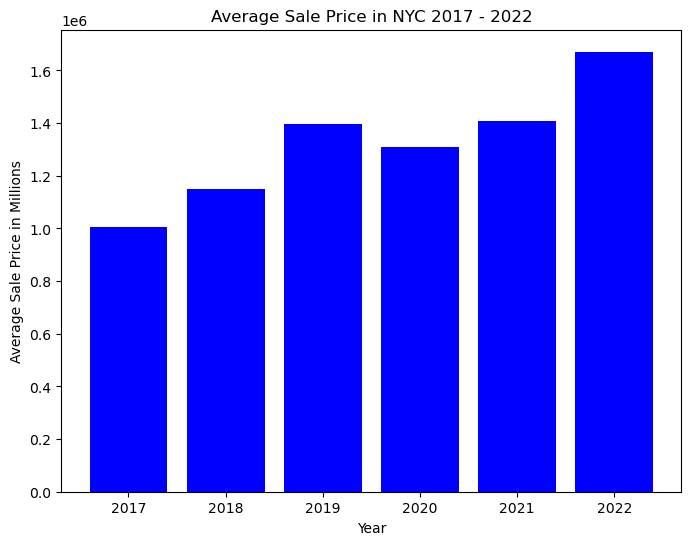

In [34]:
# Create a bar graph showing the average house sale price in NYC by year

years = ['2017', '2018', '2019', '2020', '2021', '2022']
average_sale_prices = [average_sale_price_2017, 
                       average_sale_price_2018,
                       average_sale_price_2019,
                       average_sale_price_2020,
                       average_sale_price_2021,
                       average_sale_price_2022]

plt.figure(figsize=(8, 6))
plt.bar(years, average_sale_prices, color='blue')
plt.xlabel('Year')
plt.ylabel('Average Sale Price in Millions')
plt.title('Average Sale Price in NYC 2017 - 2022')
plt.show()

In [35]:
# Create a final dataframe for 2017 - 2022
merge_years = [cleaning_data_2017, cleaning_data_2018, cleaning_data_2019, cleaning_data_2020,
              cleaning_data_2021, cleaning_data_2022]
all_data = pd.concat(merge_years)
#all_data



# Drop any null values from SALE PRICE
all_data.drop(all_data[all_data['19'] == 0].index, inplace = True)
all_data


,1,10,18,19,20
0,NEIGHBORHOOD\n,ZIP CODE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,NaN
1,ALPHABET CITY,10009,C4,3750000,2017
2,ALPHABET CITY,10009,C7,5235000,2017
4,ALPHABET CITY,10009,C2,6625000,2017
10,ALPHABET CITY,10009,C6,499000,2017
...,...,...,...,...,...
8632,WOODROW,10309,B9,1,2022
8641,WOODROW,10309,V0,1116638,2022
8642,WOODROW,10309,V0,1116638,2022
8644,WOODROW,10309,V0,40000,2022


# NYC Rental Analysis

In [38]:
# Import csv file on NYC rental housing from 2017 - 2023 
# Verify the files exist. Verification method is written in markdown

file_path = Path(r"C:\Users\ppate\fintech_files\NYC_rent.csv")

#if file_path.exists():
    #print("File exists!")

In [41]:
# Create a dataframe from the csv file

raw_rental_data = pd.read_csv(file_path)
raw_rental_data

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10
0,All Downtown,Manhattan,submarket,3650.0,3700.0,3695.0,3700.0,3785.0,3724.0,3728.0,...,4850.0,4958.0,4800.0,4886.0,4950.0,4950.0,4900.0,4830.0,4850.0,4760.0
1,All Midtown,Manhattan,submarket,3470.0,3495.0,3465.0,3500.0,3500.0,3530.0,3500.0,...,4389.0,4495.0,4495.0,4578.0,4500.0,4500.0,4495.0,4500.0,4495.0,4400.0
2,All Upper East Side,Manhattan,submarket,2995.0,2995.0,2925.0,2950.0,2950.0,2950.0,2950.0,...,3900.0,4000.0,4000.0,3995.0,4000.0,4000.0,4000.0,3995.0,4000.0,3995.0
3,All Upper Manhattan,Manhattan,submarket,2350.0,2300.0,2296.0,2337.0,2350.0,2350.0,2395.0,...,2650.0,2699.0,2725.0,2800.0,2832.0,2950.0,2900.0,2900.0,2895.0,2800.0
4,All Upper West Side,Manhattan,submarket,3297.0,3300.0,3250.0,3290.0,3300.0,3350.0,3350.0,...,4450.0,4445.0,4495.0,4500.0,4463.0,4400.0,4500.0,4500.0,4500.0,4495.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Windsor Terrace,Brooklyn,neighborhood,2500.0,2500.0,2400.0,2500.0,2650.0,2750.0,2600.0,...,3000.0,3000.0,3200.0,3400.0,3355.0,3353.0,3400.0,3200.0,3300.0,3200.0
194,Woodhaven,Queens,neighborhood,1595.0,1675.0,1750.0,1995.0,2100.0,1750.0,1700.0,...,2299.0,2150.0,2500.0,2500.0,2450.0,2100.0,2100.0,2200.0,2700.0,2750.0
195,Woodlawn,Bronx,neighborhood,NaN,NaN,1750.0,NaN,NaN,NaN,1625.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Woodside,Queens,neighborhood,1850.0,1900.0,1900.0,1900.0,1795.0,2030.0,2100.0,...,2300.0,2400.0,2300.0,2500.0,2500.0,2700.0,2675.0,2860.0,2700.0,2975.0


In [42]:
# Remove null values

raw_rental_data_df = raw_rental_data.dropna()
raw_rental_data_df

,areaName,Borough,areaType,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10
0,All Downtown,Manhattan,submarket,3650.0,3700.0,3695.0,3700.0,3785.0,3724.0,3728.0,...,4850.0,4958.0,4800.0,4886.0,4950.0,4950.0,4900.0,4830.0,4850.0,4760.0
1,All Midtown,Manhattan,submarket,3470.0,3495.0,3465.0,3500.0,3500.0,3530.0,3500.0,...,4389.0,4495.0,4495.0,4578.0,4500.0,4500.0,4495.0,4500.0,4495.0,4400.0
2,All Upper East Side,Manhattan,submarket,2995.0,2995.0,2925.0,2950.0,2950.0,2950.0,2950.0,...,3900.0,4000.0,4000.0,3995.0,4000.0,4000.0,4000.0,3995.0,4000.0,3995.0
3,All Upper Manhattan,Manhattan,submarket,2350.0,2300.0,2296.0,2337.0,2350.0,2350.0,2395.0,...,2650.0,2699.0,2725.0,2800.0,2832.0,2950.0,2900.0,2900.0,2895.0,2800.0
4,All Upper West Side,Manhattan,submarket,3297.0,3300.0,3250.0,3290.0,3300.0,3350.0,3350.0,...,4450.0,4445.0,4495.0,4500.0,4463.0,4400.0,4500.0,4500.0,4500.0,4495.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,West Harlem,Manhattan,neighborhood,2350.0,2498.0,2500.0,2500.0,2600.0,2583.0,2750.0,...,2650.0,3075.0,3225.0,3218.0,3195.0,3025.0,3195.0,3000.0,2875.0,2788.0
188,West Village,Manhattan,neighborhood,3565.0,3595.0,3600.0,3680.0,3799.0,3800.0,3827.0,...,5200.0,5198.0,5000.0,5025.0,5250.0,5195.0,5093.0,4973.0,4995.0,4995.0
192,Williamsburg,Brooklyn,neighborhood,3000.0,3000.0,3050.0,3100.0,3145.0,3190.0,3115.0,...,4250.0,4275.0,4300.0,4350.0,4450.0,4500.0,4500.0,4500.0,4500.0,4500.0
193,Windsor Terrace,Brooklyn,neighborhood,2500.0,2500.0,2400.0,2500.0,2650.0,2750.0,2600.0,...,3000.0,3000.0,3200.0,3400.0,3355.0,3353.0,3400.0,3200.0,3300.0,3200.0


In [43]:
#print(raw_rental_data_df.columns)

# NYC average rent price per year

In [44]:
# Isolate data for all of 2017, and calculated the average rent price for 2017

rental_2017 = raw_rental_data_df.loc[:, ['2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12']].mean()
#rental_2017
average_rent_per_month_2017 = rental_2017.mean().mean()

print(f"The average price for rent in NYC for 2017 was ${average_rent_per_month_2017:.2f}")

# Isolate data for all of 2018, and calculated the average rent price for 2018

rental_2018 = raw_rental_data_df.loc[:, ['2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12']].mean()
#rental_2018

average_rent_per_month_2018 = rental_2018.mean().mean()

print(f"The average price for rent in NYC for 2018 was ${average_rent_per_month_2018:.2f}")

# Isolate data for all of 2019, and calculated the average rent price for 2019

rental_2019 = raw_rental_data_df.loc[:, ['2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12']].mean()
#rental_2019

average_rent_per_month_2019 = rental_2019.mean().mean()

print(f"The average price for rent in NYC for 2019 was ${average_rent_per_month_2019:.2f}")

# Isolate data for all of 2020, and calculated the average rent price for 2020

rental_2020 = raw_rental_data_df.loc[:, ['2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12']].mean()
#rental_2020

average_rent_per_month_2020 = rental_2020.mean().mean()

print(f"The average price for rent in NYC for 2020 was ${average_rent_per_month_2020:.2f}")

# Isolate data for all of 2021, and calculated the average rent price for 2021

rental_2021 = raw_rental_data_df.loc[:, ['2021-01', '2021-02', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12']].mean()
#rental_2021

average_rent_per_month_2021 = rental_2021.mean().mean()

print(f"The average price for rent in NYC for 2021 was ${average_rent_per_month_2021:.2f}")

# Isolate data for all of 2022, and calculated the average rent price for 2022

rental_2022 = raw_rental_data_df.loc[:, ['2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12']].mean()
#rental_2022

average_rent_per_month_2022 = rental_2022.mean().mean()

print(f"The average price for rent in NYC for 2022 was ${average_rent_per_month_2022:.2f}")

# Isolate data for all of 2023, and calculated the average rent price for 2023

rental_2023 = raw_rental_data_df.loc[:, ['2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06']].mean()
#rental_2023

average_rent_per_month_2023 = rental_2023.mean().mean()

print(f"The average price for rent in NYC for 2023 was ${average_rent_per_month_2023:.2f}")

The average price for rent in NYC for 2017 was $2633.69
The average price for rent in NYC for 2018 was $2677.33
The average price for rent in NYC for 2019 was $2777.34
The average price for rent in NYC for 2020 was $2656.22
The average price for rent in NYC for 2021 was $2664.23
The average price for rent in NYC for 2022 was $3251.22
The average price for rent in NYC for 2023 was $3410.11


# NYC rent prices graph

In [45]:
# Line graph showing the trend of rent prices in NYC from 2017 - 2023

rental_2017_to_2023 = raw_rental_data_df.loc[:, ['2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09',
       '2023-10']].mean()

rental_2017_to_2023
rental_2017_to_2023.hvplot.line(
    xlabel = "Year and Month",
    ylabel = "Rent Price",
    title = "Rent Prices of NYC 2017 - 2023"
)

:Curve   [index]   (0)

# NYC Crime Analysis

In [47]:
# Import csv files on number of crimes committed in NYC
#Verified file_path works (in markdown)

file_path = Path(r"C:\Users\ppate\fintech_files\NYPD_Arrests_Data__Historic__2017.csv")
file_path_2 = Path(r"C:\Users\ppate\fintech_files\NYPD_Arrest_Data__Year_to_Date_.csv")
file_path_3 = Path(r"C:\Users\ppate\fintech_files\2023_NYPD_Arrest_Data__Year_to_Date.csv")

#if file_path.exists():
    #print("File exists!")

File exists!


In [48]:
# Turn the csv files into a dataframe using pandas, and then merge all three 
# dataframes into one
first_df = pd.read_csv(file_path)
second_df = pd.read_csv(file_path_2)
third_df = pd.read_csv(file_path_3)


data = [first_df, second_df, third_df]
nyc_arrest = pd.concat(data)
nyc_arrest

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,New Georeferenced Column
0,203575866,1/2/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,44,1.0,45-64,M,BLACK,1006032,243764,40.835733,-73.921285,POINT (-73.92128542599994 40.83573258000007),NaN
1,205273292,1/2/2017,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,B,46,0.0,25-44,M,WHITE HISPANIC,1012545,252687,40.860205,-73.897711,POINT (-73.897711041 40.86020510700008),NaN
2,204473933,1/3/2017,508.0,"DRUG PARAPHERNALIA, POSSESSE",235.0,DANGEROUS DRUGS,PL 2205002,M,K,84,0.0,65+,M,WHITE HISPANIC,988309,190905,40.690674,-73.985365,POINT (-73.98536490099997 40.69067418100008),NaN
3,203068773,1/3/2017,503.0,"CONTROLLED SUBSTANCE,INTENT TO",117.0,DANGEROUS DRUGS,PL 2201601,F,B,52,0.0,45-64,M,BLACK,1019388,259017,40.877554,-73.872939,POINT (-73.87293947099994 40.87755442800005),NaN
4,205616936,1/4/2017,273.0,"TAMPERING 1,CRIMINAL",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1452000,F,K,84,1.0,25-44,M,BLACK,988089,190305,40.689027,-73.986159,POINT (-73.98615855199995 40.689027417000034),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0.0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,NaN,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0.0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,NaN,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0.0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,NaN,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490.0,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0.0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,NaN,POINT (-74.00281242 40.60020423)


In [49]:
#print(nyc_arrest.columns)

In [50]:
# Drop unrelevant columns

nyc_arrests = nyc_arrest.drop(
    ["ARREST_KEY", 
     "PD_CD", 
     "PD_DESC",
     "KY_CD", 
     "LAW_CODE", 
     "LAW_CAT_CD",
     "JURISDICTION_CODE",
     "New Georeferenced Column", 
     "X_COORD_CD", 
     "Y_COORD_CD",
     "Lon_Lat"],
    axis = 1)
nyc_arrests

,ARREST_DATE,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,1/2/2017,OTHER OFFENSES RELATED TO THEF,B,44,45-64,M,BLACK,40.835733,-73.921285
1,1/2/2017,FORGERY,B,46,25-44,M,WHITE HISPANIC,40.860205,-73.897711
2,1/3/2017,DANGEROUS DRUGS,K,84,65+,M,WHITE HISPANIC,40.690674,-73.985365
3,1/3/2017,DANGEROUS DRUGS,B,52,45-64,M,BLACK,40.877554,-73.872939
4,1/4/2017,CRIMINAL MISCHIEF & RELATED OF,K,84,25-44,M,BLACK,40.689027,-73.986159
...,...,...,...,...,...,...,...,...,...
170090,07/07/2023,ROBBERY,B,52,25-44,M,BLACK,40.869067,-73.880600
170091,08/18/2023,SEX CRIMES,B,47,25-44,F,BLACK,40.887314,-73.847272
170092,09/13/2023,OTHER TRAFFIC INFRACTION,S,122,25-44,M,WHITE HISPANIC,40.610087,-74.116666
170093,06/15/2023,POSSESSION OF STOLEN PROPERTY,K,62,25-44,M,BLACK,40.600204,-74.002812


In [51]:
# Created a new column stating the year the crime was committed, then dropped 
#the original "ARREST_DATE" column. This should help create visuals based 
#on the year. 

nyc_arrests['ARREST_DATE'] = pd.to_datetime(nyc_arrests['ARREST_DATE'])
nyc_arrests['Year'] = nyc_arrests['ARREST_DATE'].dt.strftime('%Y')
#nyc_arrests

final_df = nyc_arrests.drop(["ARREST_DATE"], axis = 1)
final_df

,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Year
0,OTHER OFFENSES RELATED TO THEF,B,44,45-64,M,BLACK,40.835733,-73.921285,2017
1,FORGERY,B,46,25-44,M,WHITE HISPANIC,40.860205,-73.897711,2017
2,DANGEROUS DRUGS,K,84,65+,M,WHITE HISPANIC,40.690674,-73.985365,2017
3,DANGEROUS DRUGS,B,52,45-64,M,BLACK,40.877554,-73.872939,2017
4,CRIMINAL MISCHIEF & RELATED OF,K,84,25-44,M,BLACK,40.689027,-73.986159,2017
...,...,...,...,...,...,...,...,...,...
170090,ROBBERY,B,52,25-44,M,BLACK,40.869067,-73.880600,2023
170091,SEX CRIMES,B,47,25-44,F,BLACK,40.887314,-73.847272,2023
170092,OTHER TRAFFIC INFRACTION,S,122,25-44,M,WHITE HISPANIC,40.610087,-74.116666,2023
170093,POSSESSION OF STOLEN PROPERTY,K,62,25-44,M,BLACK,40.600204,-74.002812,2023


In [52]:
# Create a Boolean mask for the rows to remove data from 2017. There is not
#enough data from that year for it to be accurate

mask = final_df['Year'] == '2017'
df = final_df[~mask]
df

,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Year
34041,BURGLARY,M,33,25-44,M,BLACK HISPANIC,40.840784,-73.936253,2018
34042,DANGEROUS WEAPONS,B,40,25-44,M,WHITE,40.816981,-73.921152,2018
34043,SEX CRIMES,Q,115,45-64,M,WHITE HISPANIC,40.756861,-73.875657,2018
34044,BURGLARY,M,14,45-64,M,BLACK,40.753464,-73.994400,2018
34045,CRIMINAL TRESPASS,K,63,45-64,M,BLACK,40.630005,-73.944675,2018
...,...,...,...,...,...,...,...,...,...
170090,ROBBERY,B,52,25-44,M,BLACK,40.869067,-73.880600,2023
170091,SEX CRIMES,B,47,25-44,F,BLACK,40.887314,-73.847272,2023
170092,OTHER TRAFFIC INFRACTION,S,122,25-44,M,WHITE HISPANIC,40.610087,-74.116666,2023
170093,POSSESSION OF STOLEN PROPERTY,K,62,25-44,M,BLACK,40.600204,-74.002812,2023


# Graph NYC Number of Arrests 2018 - 2023

<Axes: title={'center': 'Number of Arrests from 2018 - 2023'}, xlabel='Year'>

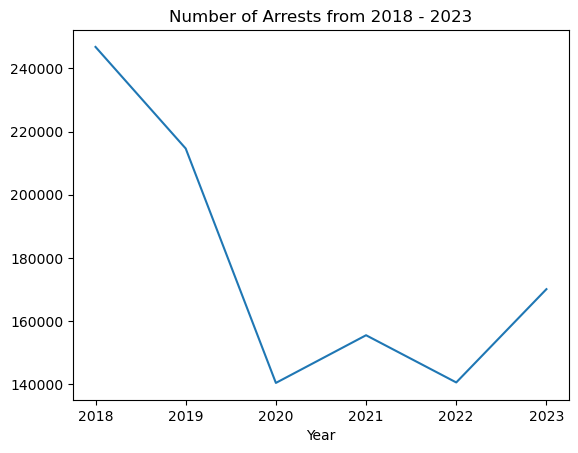

In [53]:
#Plot a bar graph showing number of arrests from 2018 - 2023
arrest_count = df["Year"].groupby(df["Year"]).agg('count')

arrest_count.plot.line(
    title = "Number of Arrests from 2018 - 2023")